YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


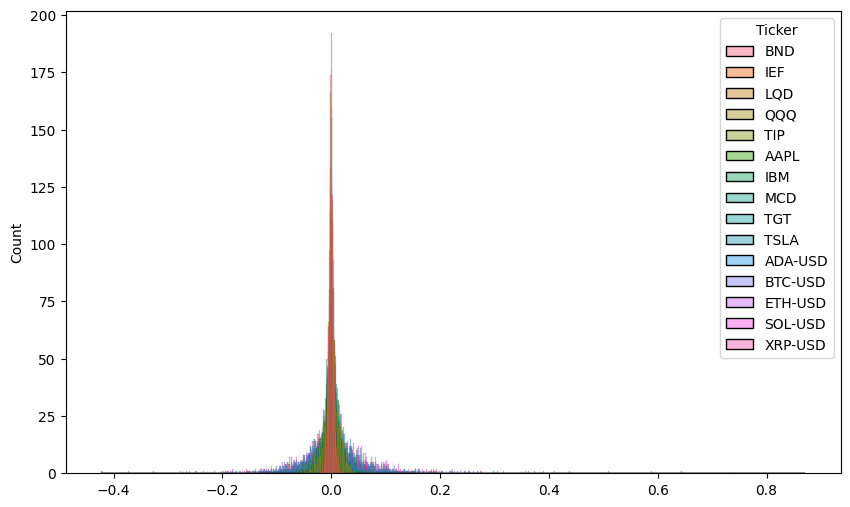

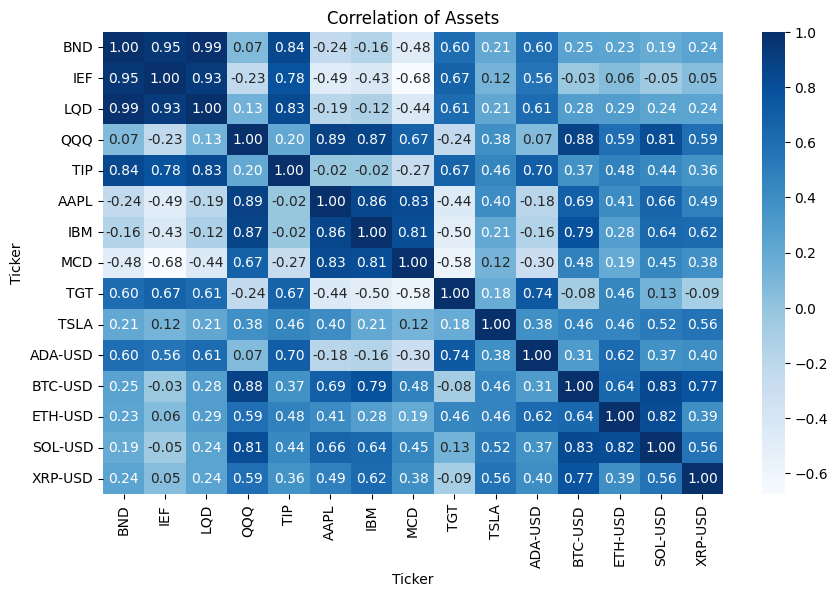

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import risk_models,EfficientFrontier,expected_returns
import pandas as pd
import seaborn as sns



stock_tickers = ['AAPL', 'TGT', 'MCD', 'IBM', 'TSLA']
ETF_tickers = ['BND', 'QQQ', 'TIP', 'IEF', 'LQD']
CRYPTO_tickers = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'ADA-USD', 'XRP-USD']



start_date = "2020-10-10"
end_date =  "2025-05-12"

df_stocks = yf.download(stock_tickers,start_date,end_date,period="max")['Close']
df_etf = yf.download(ETF_tickers,start_date,end_date,period="max")['Close']
crypto_df = yf.download(CRYPTO_tickers,start_date,end_date,period="max")['Close']
""" First Combining all assets into one dataframe"""
df_combined = pd.concat([df_etf,df_stocks,crypto_df],axis=1)
df_combined.dropna(inplace=True)

"""Returns of the portfolio and correlation matrix"""

returns = df_combined.pct_change().dropna()
corr_matrix = df_combined.corr()


""" Showing  The Central Limit Theorm"""

plt.figure(figsize=(10,6))
sns.histplot(returns,label="Histo Gram of all returns")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,fmt=".2f",annot=True,cmap="Blues")
plt.title("Correlation of Assets")
plt.show()



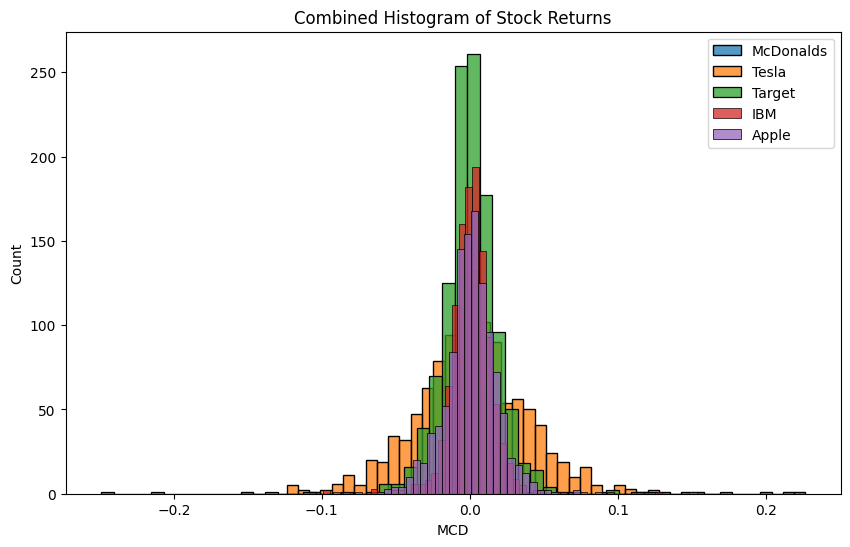

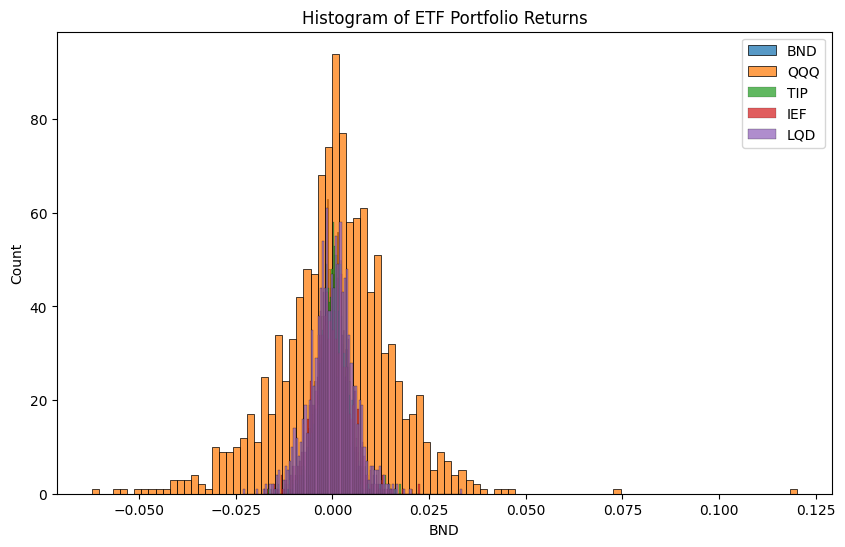

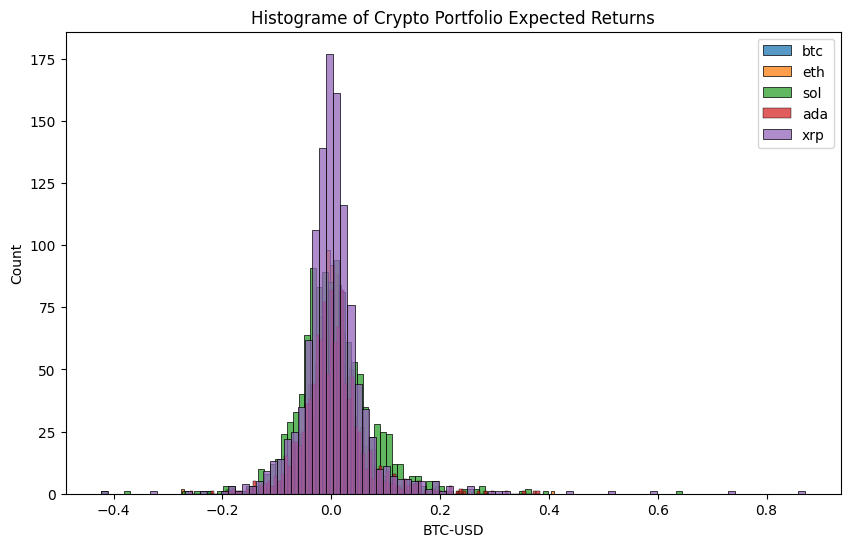

In [2]:

"""W1 + W2 +...... + Wn = 1; St Max Wi  (E(rp) - risk-free rate) / standard deviation overall portfolio
you want to maximize the sharpe ratio st the number of asset classes, which has to add up to 1 to optimize
the portfolio. The more negatively corrected the assets are, the closer you are to a perect hedge and higher re-
wards and less risk"""

"""Quick histplots of stock returns (the returns in this portfolio will lead to a standard bell-curve due to
the clt)"""
plt.figure(figsize=(10,6))
sns.histplot(returns['MCD'],bins=50,label="McDonalds")
sns.histplot(returns['TSLA'],bins=50,label="Tesla")
sns.histplot(returns['TGT'],bins=50,label="Target")
sns.histplot(returns['IBM'],bins=50,label="IBM")
sns.histplot(returns['AAPL'],bins=50,label="Apple")
plt.title("Combined Histogram of Stock Returns")
plt.legend()
plt.show()


"""ETF Portfolio Histogram"""


plt.figure(figsize=(10,6))
sns.histplot(returns['BND'],bins=100,label="BND")
sns.histplot(returns['QQQ'],bins=100,label="QQQ")
sns.histplot(returns['TIP'],bins=100,label="TIP")
sns.histplot(returns['IEF'],bins=100,label="IEF")
sns.histplot(returns['LQD'],bins=100,label="LQD")
plt.title("Histogram of ETF Portfolio Returns")
plt.legend()
plt.show()



"""Crypto Currency Histogram of returns"""



plt.figure(figsize=(10,6))
sns.histplot(returns['BTC-USD'],bins=100,label="btc")
sns.histplot(returns['ETH-USD'],bins=100,label="eth")
sns.histplot(returns['SOL-USD'],bins=100,label="sol")
sns.histplot(returns['ADA-USD'],bins=100,label="ada")
sns.histplot(returns['XRP-USD'],bins=100,label="xrp")
plt.title("Histograme of Crypto Portfolio Expected Returns")
plt.legend()
plt.show()









In [3]:
""" the Var(Not Variance) Value at Risk is the worst possible outcome dependent of returns and is located
in the middle of 3stds from the mean
with portfolio diversification, you want to optimize your weights so you do not put all eggs in one basket"""

def get_expexted_returns(dataframe):
    mu = expected_returns.mean_historical_return(dataframe)
    vol = risk_models.sample_cov(dataframe)
    risk_premium = mu - 0.0005
    ef = EfficientFrontier(mu, vol)
    weights = ef.max_sharpe()
    weights_optimized = ef.portfolio_performance(verbose=True)
    

    
    return {
        "Expected Returns":mu,
        "Volatility":vol,
        "Risk Premium":risk_premium,
        "Efficient Frontier":ef,
        "portfolio_weights":weights,
        "Optimized Weights":weights_optimized,
        }


get_expexted_returns(df_combined)


Expected annual return: 41.2%
Annual volatility: 26.4%
Sharpe Ratio: 1.56


{'Expected Returns': Ticker
 BND       -0.013233
 IEF       -0.031056
 LQD       -0.017545
 QQQ        0.124038
 TIP        0.005944
 AAPL       0.114103
 IBM        0.225328
 MCD        0.098935
 TGT       -0.089311
 TSLA       0.167111
 ADA-USD    0.535563
 BTC-USD    0.615622
 ETH-USD    0.484037
 SOL-USD    1.513151
 XRP-USD    0.624750
 dtype: float64,
 'Volatility': Ticker        BND       IEF       LQD       QQQ       TIP      AAPL       IBM  \
 Ticker                                                                          
 BND      0.003773  0.004728  0.005190  0.002960  0.003231  0.003257  0.000530   
 IEF      0.004728  0.006249  0.006232  0.001754  0.004140  0.002122 -0.000369   
 LQD      0.005190  0.006232  0.008046  0.007722  0.004422  0.008091  0.002364   
 QQQ      0.002960  0.001754  0.007722  0.054887  0.002870  0.053621  0.017966   
 TIP      0.003231  0.004140  0.004422  0.002870  0.004178  0.003191  0.000605   
 AAPL     0.003257  0.002122  0.008091  0.053621  0.

In [4]:
"""Weight are optimized on the entire portfolio when W_e* = .41 into stocks,
W*_etf = .26; W*_crypto = 1 - (W_e* + W*_etf) -> .33"""
print("Culmulative Weight of all Optimizer weights combined")
print(.33 + .26 + .41)








Culmulative Weight of all Optimizer weights combined
1.0


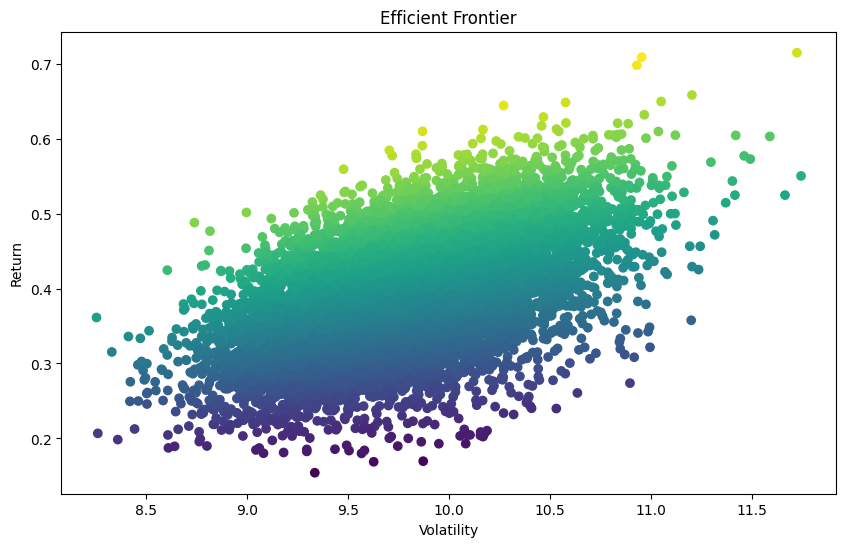

In [5]:
"""Plotting the Efficient Frontier"""


mean_returns = returns.mean()
num_portfolios = 10000
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
  
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(corr_matrix, weights))) * np.sqrt(252)
      
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = portfolio_return / portfolio_std_dev
  
results_df = pd.DataFrame(results.T,columns=['Return','Volatility','Sharpe'])

plt.figure(figsize=(10,6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()